## 学习率优化算法-HeiMa法
每一次梯度下降后，计算当前的mse，并且存储起来  
对比最近两次的mse，计算他们的差值  
如果mse变大，说明步子太大，学习速率需要降低，learningrate = learningrate / 2  
如果mse变小，说明步子没问题，看能不能走的再快一点，learningrate = learningrate × 1.05  
重复上述步骤

In [5]:
 import numpy as np
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistory = []
bhistory = []
# 记录mse的变化过程
msehistory = []

Weight=np.ones((2,1))#m,b，采用矩阵的方式指定权重
ones=np.ones((len(data),1))
Feature=np.hstack((data[:,0:1],ones))
label=data[:,1:2]

learningrate = 0.001

def gradentdecent2():#采用矩阵的方式梯度下降
    global Weight,learningrate
    Weight=Weight-learningrate*np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    mhistory.append(Weight[0][0])
    bhistory.append(Weight[1][0])
    mse=np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)
    #对比最近两次的mse，计算他们的差值  
    #如果mse变大，说明步子太大，学习速率需要降低，learningrate = learningrate / 2  
    #如果mse变小，说明步子没问题，看能不能走的再快一点，learningrate = learningrate × 1.05  
    if(len(msehistory)>=2):#保证我们已经记录两条mse的数据
        if(msehistory[-1]>msehistory[-2]):#mse是增加的
            learningrate=learningrate/2
        else:#mse是增加的,适当增加一下步伐
            learningrate=learningrate*1.2

    
i = 0
for i in range(500000):
    gradentdecent2()

<IPython.core.display.Javascript object>


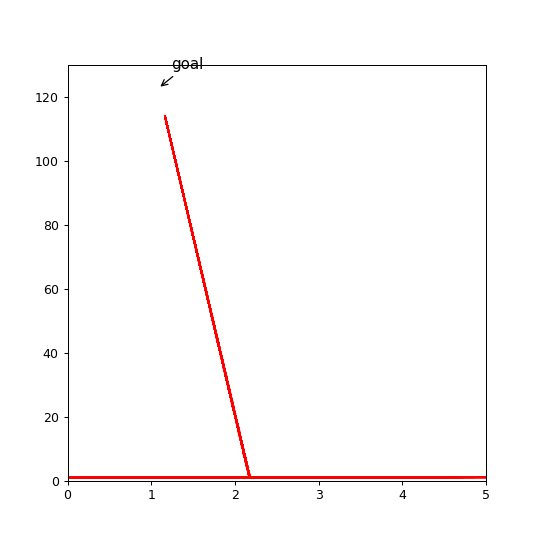

In [6]:
## 以动画的方式展示m和b收敛的过程
## m=1.0859,b=122.68
# 导入动画包
import matplotlib.animation as animation
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)
axis_name,=plt.plot(mhistory,bhistory,c='r')
plt.annotate("goal",xy=(1.0859,122.68),xytext=(+10,+15),textcoords='offset points',fontsize=12,arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistory[0:num*1000],bhistory[0:num*1000])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

## 升级黑马2代学习速率优化算法

In [16]:
#参考pid算法中的i，考虑历史误差，根据历史误差的情况，决定学习速率
#假设slop就是历史的mse变化率，100,80,40,20,10,10,5,2,1,0.1,0.001,0.0001
slop=np.array([100,80,60,40,20,10,0.1,100])

cache=0 #历史mse变化率的缓存
for item in slop:
    cache=cache+item**2
    print(item/np.sqrt(cache))


1.0
0.624695047554
0.424264068712
0.272165526976
0.134839972493
0.0672672793996
0.000672672641808
0.558145485247


输入  
VAR_INPUT  
	p: LREAL;  
	i: LREAL;  
	d: LREAL;  
	setposition: LREAL;  
	actual_position: LREAL;  
END_VAR  
输出  
VAR_OUTPUT  
	settorque: INT:=0;  
END_VAR  
内部变量  
VAR  
	err: LREAL;  
	err_1: LREAL;  
	err_2: LREAL;  	
END_VAR  
输入输出变量  
VAR_IN_OUT  
	integral: LREAL;  
END_VAR  

err:=setposition-actual_position;  
integral:=integral+err * 0.01;  
settorque:=LREAL_TO_INT(p * err+i * integral+d * (err-err_1));  
    
pid_ctrl(
	p:=pid_Kp , 
	i:=pid_Ki , 
	d:=pid_Kd ,
    integral:=integral, 
	setposition:=pid_setposition , 
	actual_position:=actual_position , 
	settorque=>write_torque
     );

In [17]:
 import numpy as np
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistory = []
bhistory = []
# 记录mse的变化过程
msehistory = []

Weight=np.ones((2,1))#m,b，采用矩阵的方式指定权重
ones=np.ones((len(data),1))
Feature=np.hstack((data[:,0:1],ones))
label=data[:,1:2]

learningrate = 2

#初始化cache 记录m和b的变化率
cache=np.zeros((2,1))

def gradentdecent3():#采用矩阵的方式梯度下降
    global Weight,learningrate,cache
    #计算的是m和b的梯度
    slop=np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    
    mse=np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)
    #对比最近两次的mse，计算他们的差值  
    #如果mse变大，说明步子太大，学习速率需要降低，learningrate = learningrate / 2  
    #如果mse变小，说明步子没问题，看能不能走的再快一点，learningrate = learningrate × 1.05  
    if(len(msehistory)>=2):#保证我们已经记录两条mse的数据
        if(msehistory[-1]>msehistory[-2]):#mse是增加的
            learningrate=learningrate/2
        else:#mse是增加的,适当增加一下步伐
            learningrate=learningrate*1.2
    
    #关键代码，考虑历史的梯度变化率
    ## 如果历史偏差大，惩罚收敛（不让他收敛）,learningrate变大；历史变化小，激励收敛，learningrate变小
    cache=cache+slop**2
    
    Weight=Weight-learningrate*slop/np.sqrt(cache)
    mhistory.append(Weight[0][0])
    bhistory.append(Weight[1][0])
    
i = 0
for i in range(50000):
    gradentdecent3()

<IPython.core.display.Javascript object>


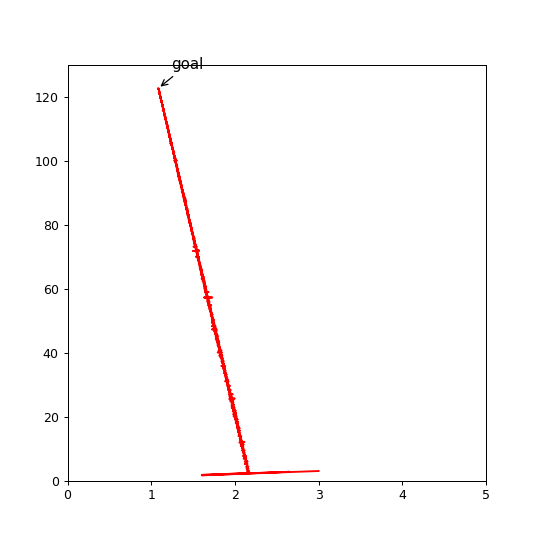

In [19]:
## 以动画的方式展示m和b收敛的过程
## m=1.0859,b=122.68
# 导入动画包
import matplotlib.animation as animation
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)
axis_name,=plt.plot(mhistory[0:100],bhistory[0:100],c='r')
plt.annotate("goal",xy=(1.0859,122.68),xytext=(+10,+15),textcoords='offset points',fontsize=12,arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistory[0:num*100],bhistory[0:num*100])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

如何找到合适的learningrate，如何优化学习速率？¶  
目前有超级都的learningrate优化的框架和论文，  

adam https://ruder.io/optimizing-gradient-descent/  
adagrad https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827  
RMSProp https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a  
Momentum https://engmrk.com/gradient-descent-with-momentum/  

## momentum算法实现
momentum动量，冲量  
在冰上推箱子，相当于加了momentum，在沙子上相当于没有momentum  
普通梯度下降  
越走幅度越大

In [20]:
 import numpy as np
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistory = []
bhistory = []
# 记录mse的变化过程
msehistory = []

Weight=np.ones((2,1))#m,b，采用矩阵的方式指定权重
ones=np.ones((len(data),1))
Feature=np.hstack((data[:,0:1],ones))
label=data[:,1:2]
#学习速率
learningrate = 0.00002

#声明一个矩阵存储两个方向的历史速度（惯性）
v=np.zeros((2,1))

def gradentdecent4():#采用矩阵的方式梯度下降
    global Weight,learningrate,v
    mse=np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)
    #计算的是m和b的梯度
    slop=np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    #新的速度，历史速度*0.9（惯性系数）-学习速率*梯度
    #0.99比0.9更滑，0.999就跑出去了就太滑了
    v=v*0.99-learningrate*slop    
    Weight=Weight+v
    #记录m，b
    mhistory.append(Weight[0][0])
    bhistory.append(Weight[1][0])

In [21]:
i = 0
for i in range(50000):
    gradentdecent4()

<IPython.core.display.Javascript object>


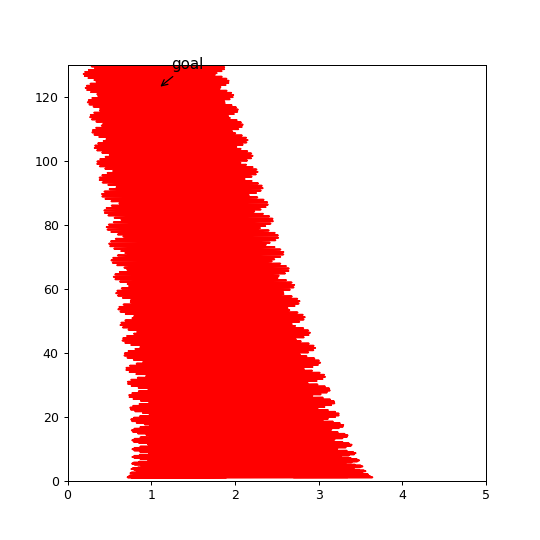

In [22]:
## 以动画的方式展示m和b收敛的过程
## m=1.0859,b=122.68
# 导入动画包
import matplotlib.animation as animation
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)
axis_name,=plt.plot(mhistory[0:100],bhistory[0:100],c='r')
plt.annotate("goal",xy=(1.0859,122.68),xytext=(+10,+15),textcoords='offset points',fontsize=12,arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistory[0:num*100],bhistory[0:num*100])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

# 可变自适应学习速率adagrad（标准版）
比上述代码更严谨  
0不可以做分母  
加了小技巧  
注意学习速率大于1

In [24]:
 import numpy as np
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistory = []
bhistory = []
# 记录mse的变化过程
msehistory = []

Weight=np.ones((2,1))#m,b，采用矩阵的方式指定权重
ones=np.ones((len(data),1))
Feature=np.hstack((data[:,0:1],ones))
label=data[:,1:2]

learningrate = 2

#初始化cache 记录m和b的变化率
cache=np.zeros((2,1))

def gradentdecent5():#采用矩阵的方式梯度下降
    global Weight,learningrate,cache
    #计算的是m和b的梯度
    slop=np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    
    mse=np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)
    #对比最近两次的mse，计算他们的差值  
    #如果mse变大，说明步子太大，学习速率需要降低，learningrate = learningrate / 2  
    #如果mse变小，说明步子没问题，看能不能走的再快一点，learningrate = learningrate × 1.05  
    if(len(msehistory)>=2):#保证我们已经记录两条mse的数据
        if(msehistory[-1]>msehistory[-2]):#mse是增加的
            learningrate=learningrate/2
        else:#mse是增加的,适当增加一下步伐
            learningrate=learningrate*1.2
    
    #关键代码，考虑历史的梯度变化率
    ## 如果历史偏差大，惩罚收敛（不让他收敛）,learningrate变大；历史变化小，激励收敛，learningrate变小
    cache=cache+slop**2
    
    Weight=Weight-learningrate*slop/np.sqrt(cache+0.0000000001)
    mhistory.append(Weight[0][0])
    bhistory.append(Weight[1][0])
    
i = 0
for i in range(50000):
    gradentdecent5()

<IPython.core.display.Javascript object>


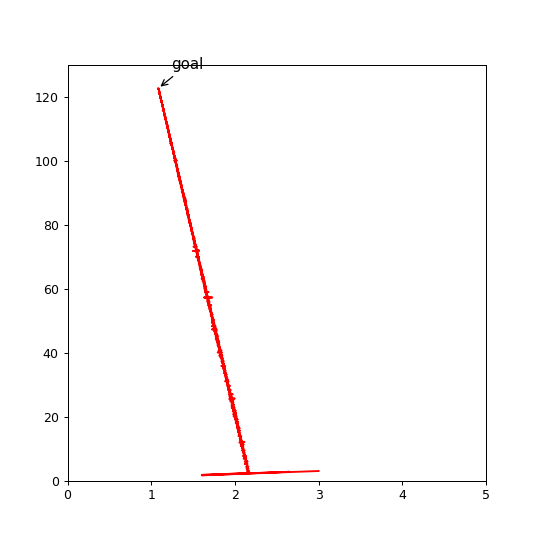

In [25]:
## 以动画的方式展示m和b收敛的过程
## m=1.0859,b=122.68
# 导入动画包
import matplotlib.animation as animation
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)
axis_name,=plt.plot(mhistory[0:100],bhistory[0:100],c='r')
plt.annotate("goal",xy=(1.0859,122.68),xytext=(+10,+15),textcoords='offset points',fontsize=12,arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistory[0:num*100],bhistory[0:num*100])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

## RMSprop实现
### 辛顿——神经网络之父hinton  
### 数据回归算法比较激进
历史因子一开始很大，黑森就不太适用  
不能完全依赖于一开始的表现，考虑一部分历史，考虑一部分现在  
decay衰退系数，典型系数是0.9,0.99,0.999等  
好处：迭代次数多就cache会变得很小
当前成绩、历史成绩共同决定cache  
其他的和adagrad一样，除了小的优化：可以给cache设置初始值，不建议设置为0，因为分母可能会很小，建议初始化为1

In [26]:
 import numpy as np
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistory = []
bhistory = []
# 记录mse的变化过程
msehistory = []

Weight=np.ones((2,1))#m,b，采用矩阵的方式指定权重
ones=np.ones((len(data),1))
Feature=np.hstack((data[:,0:1],ones))
label=data[:,1:2]

learningrate = 0.1

#初始化cache 记录m和b的变化率
cache=np.ones((2,1))
#衰减系数
decay=0.99

def gradentdecent6():#采用矩阵的方式梯度下降
    global Weight,learningrate,cache
    #计算MSE
    mse=np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)
    #计算的是m和b的梯度
    slop=np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    #关键代码，rmsprop
    ## 记录历史变换。使用decay表示衰减
    cache=cache*decay+(1-decay)*slop**2
    
    Weight=Weight-learningrate*slop/np.sqrt(cache+0.000000001)
    mhistory.append(Weight[0][0])
    bhistory.append(Weight[1][0])
    
i = 0
for i in range(50000):
    gradentdecent6()

<IPython.core.display.Javascript object>


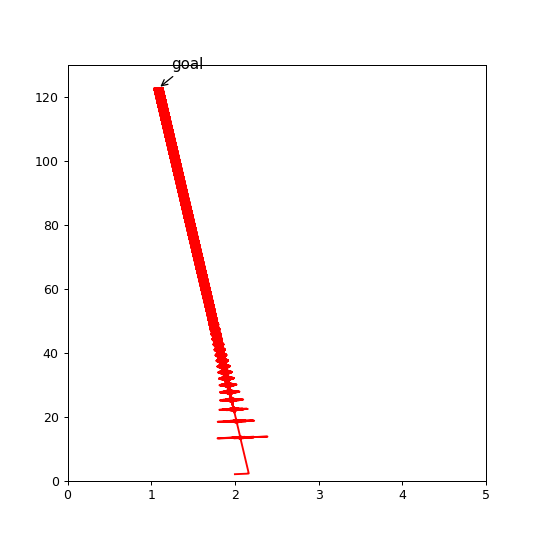

In [27]:
## 以动画的方式展示m和b收敛的过程
## m=1.0859,b=122.68
# 导入动画包
import matplotlib.animation as animation
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)
axis_name,=plt.plot(mhistory[0:100],bhistory[0:100],c='r')
plt.annotate("goal",xy=(1.0859,122.68),xytext=(+10,+15),textcoords='offset points',fontsize=12,arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistory[0:num*100],bhistory[0:num*100])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

## adam算法
adaptive moment estimation  
https://arxiv.org/pdf/1412.6980.pdf  
要你命3000，达文西  
momentum和RMSprop合体  
修偏创新

In [30]:
 import numpy as np
data = np.array([
    [80,200],
    [95,230],
    [104,245],
    [112,247],
    [125,259],
     [135,262]
])

# 两个数组记录m和b的变化过程
mhistory = []
bhistory = []
# 记录mse的变化过程
msehistory = []

Weight=np.ones((2,1))#m,b，采用矩阵的方式指定权重
ones=np.ones((len(data),1))
Feature=np.hstack((data[:,0:1],ones))
label=data[:,1:2]

learningrate = 0.1

#记录mse对m和b变化率的惯性
m=np.zeros((2,1))
#记录mse对m和b变化率的速度
v=np.zeros((2,1))

def gradentdecent7():#采用矩阵的方式梯度下降
    global Weight,learningrate,m,v
    #计算MSE
    mse=np.sum(np.square(np.dot(Feature,Weight)-label))
    msehistory.append(mse)
    #计算的是m和b的梯度
    slop=np.dot(Feature.T,(np.dot(Feature,Weight)-label))
    #核心逻辑，Adam    
    beta_1=0.9
    beta_2=0.999
    
    m=beta_1*m+(1-beta_1)*slop
    v=beta_2*v+(1-beta_2)*(slop**2)
    
    m_p=m/(1-beta_1)
    v_p=v/(1-beta_2)
    
    Weight=Weight-learningrate*m_p/np.sqrt(v_p+0.000000001)
    mhistory.append(Weight[0][0])
    bhistory.append(Weight[1][0])
    
i = 0
for i in range(50000):
    gradentdecent7()

<IPython.core.display.Javascript object>


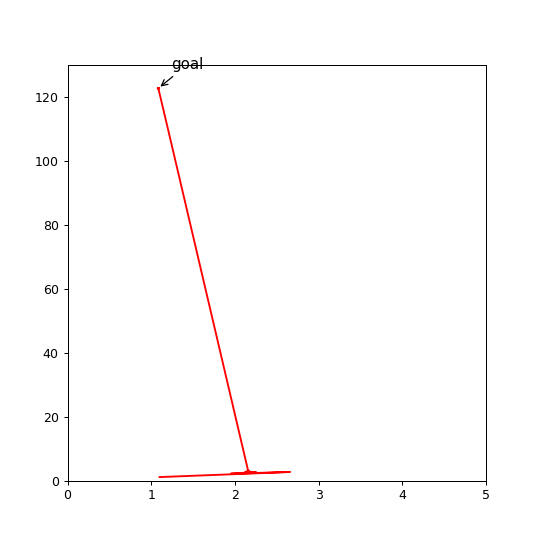

In [31]:
## 以动画的方式展示m和b收敛的过程
## m=1.0859,b=122.68
# 导入动画包
import matplotlib.animation as animation
%matplotlib notebook
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6),dpi=60)
plt.xlim(0,5)
plt.ylim(0,130)
axis_name,=plt.plot(mhistory[0:100],bhistory[0:100],c='r')
plt.annotate("goal",xy=(1.0859,122.68),xytext=(+10,+15),textcoords='offset points',fontsize=12,arrowprops=dict(arrowstyle="->"))

def update(num):
    axis_name.set_data(mhistory[0:num*100],bhistory[0:num*100])

animation.FuncAnimation(fig,update,np.arange(0,501),interval=20,repeat=False)

# 高级API
https://keras.io/api  
优化器：https://keras.io/api/optimizers/  

# 总结
论文：https://paper.nips.cc/paper/7003-the-marginal-value-of-adaptive-gradient-methods-in-machine-learning.pdf  
https://arxiv.org/pdf/1705.08292
不纠结于学术，不盲从于结论，自己动手，能解决问题就是好的方案  
一机多卡，多机多卡，能用钱解决的问题都不是问题

# babysitting学习速率
机器调的不好，人来看  
训练几个周期，看看costs的变化  
变化慢，保存数据现场，增加learningrate  
需要有一定经验，避免局部最优解

解决局部最优解问题，防止模型非常复杂  
鞍点：梯度接近于0

# 更高维度的线性回归
二维空间的线性回归，到一条直线